# 数据分析
数据分析是指用适当的统计分析方法对收集来的大量数据进行分析，提取有用信息和形成结论而对数据加以详细研究和概括总结的过程。
数据分析的数学基础在20世纪早期就已确立，但直到计算机的出现才使得实际操作成为可能，并使得数据分析得以推广。数据分析是数学与计算机科学相结合的产物。
在统计学领域，一般讲数据分析分为描述性统计分析、探索性数据分析以及验证性数据分析；其中，探索性数据分析侧重于在数据之中发现新的特征，而验证性数据分析则侧重于已有假设的证实或证伪。



## 1.1 描述性数据分析
描述性分析主要是对所收集的数据进行分析，得出反映客观现象的各种数量特征的一种分析方法。描述性分析一般运用制表和分类，图形以及计算概括性数据来描述数据特征的各项活动。描述性分析要对调查总体所有变量的有关数据进行统计性描述，主要包括数据的频数分析、集中趋势分析、离散程度分析、分布以及一些基本的统计图形。
* ①数据的频数分析。在数据的预处理部分，利用频数分析和交叉频数分析可以检验异常值。
* ②数据的集中趋势分析。用来反映数据的一般水平，常用的指标有平均值、中位数和众数等。
* ③数据的离散程度分析。主要是用来反映数据之间的差异程度，常用的指标有方差和标准差。
* ④数据的分布。在统计分析中，通常要假设样本所属总体的分布属于正态分布，因此需要用偏度和峰度两个指标来检查样本数据是否符合正态分布。
* ⑤绘制统计图。用图形的形式来表达数据，比用文字表达更清晰、更简明。使用python，可以很容易地绘制各个变量的统计图形，包括条形图、饼图和折线图等。

### 1.1.1 认识数据
本文选取一个经典的数据集加利福尼亚房价预测数据集，sklearn已经预定义了接口，我们可以方便的导入。
该数据集出现在1997年由Pace，R.Kelley和Ronald Barry撰写的题为“稀疏空间自动回归*”的论文中，该论文发表在* Statistics and Probability Letters *期刊上。他们使用1990年加州人口普查数据。每个人口普查区块组包含一行。区块组是美国人口普查局发布样本数据的最小地理单位（区块组通常拥有600至3,000人口）。

* 调整 *
此目录中的数据集几乎与原始数据集相同，但有两点不同：
* 从“total_bedrooms”列中随机删除207个值，因此我们可以讨论如何处理丢失的数据。
* 增加了一个名为“ocean_proximity”的附加分类属性，表明（非常粗略地）每个区块组是靠近海洋，靠近海湾区域，内陆还是岛屿。这允许讨论如何处理分类数

In [40]:
import pandas as pd
import os

In [50]:
# 读取已经处理的数据集，
#1 首先查看看看数据前5行，可以看见数据有10个属性值
# 此处可以的函数还有.tail(), .sample()等，读者可以自行使用。
housing=pd.read_csv('datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
#2 看列描述的基本情况，可以发现属性类型、空值数量
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
#3 进一步查看缺失值的数量,可以看见total_bedrooms有207个值缺失。
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [74]:
#4 上文中大部分属性都是数字(housing.dtypes也可以查看类型情况)，但是ocean_proximity是对象结构，可以进一步侦查
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.1.2 数据的集中趋势分析
集中趋势又称“数据的中心位置”、“集中量数”等。它是一组数据的代表值。集中趋势的概念就是平均数的概念，它能够对总体的某一特征具有代表性，表明所研究的舆论现象在一定时间、空间条件下的共同性质和一般水平。就变量数列而言，由于整个变量数列是以平均数为中心而上下波动的，所以平均数反映了总体分布的集中趋势，它是表明总体分布的一个重要特征值。根据变量数列的平均数，就可以了解所研究总体的集中趋势和一般特征。集中趋势是用来描述舆论现象的重要统计分析指标，常用的有平均数、中位数和众数等，它们在不同类型的分布数列中有不同的测定方法。

In [62]:
#1 最后看一下每列中数据属性的统计情况，包含个数、均值、标准差、最小、最大(空值列被忽略处理)，以及25%,50%,75%给定百分比所占个数
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [63]:
#2 中位数
housing.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [64]:
#3 众数
housing.mode()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.31,34.06,52.0,1527.0,280.0,891.0,306.0,3.1250,500001.0,<1H OCEAN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0001,NaN,NaN


### 1.1.3 数据的离散程度分析
我们通常使用均值、中位数、众数等统计量来反映数据的集中趋势，但这些统计量无法完全反应数据的特征，即使均值相等的数据集也存在无限种分布的可能，所以需要结合数据的离散程度。常用的可以反映数据离散程度的统计量如下：

方差为无偏样本方差，公式为 $\sigma^2 = \frac{ \sum\limits_{i=1}^{N}{ (x_i - \overline x) } } { N-1 }$

In [79]:
housing.var()

longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median_house_value    1.331615e+10
dtype: float64

### 1.1.4 数据的分布

偏度是数据的不对称程度。无论偏度值是 0、正数还是负数，都显示有关数据分布形状的信息。当数据变得更加对称时，它的偏度值会更接近零。通过沿这一正态数据直方图的中间绘制一条线，可以很容易地看到两侧互相构成镜像。但是，没有偏度并不表示具有正态性。正偏斜或右偏斜的数据之所以这样命名，是因为分布的“尾部”指向右侧，而且它的偏度值大于 0（或为正数）。薪金数据通常按这种方式偏斜：一家公司中许多员工的薪金相对较低，而少数人员的薪金则非常高。左偏斜或负偏斜的数据之所以这样命名，是因为分布的“尾部”指向左侧，而且它产生负数偏度值。故障率数据通常就是左偏斜的。以灯泡为例：极少数灯泡会立即就烧坏，但大部分灯泡都会持续相当长的时间。<br >

峰度表示分布的尾部与正态分布的区别。使用峰度可帮助您初步了解有关数据分布的一般特征。具有正峰度值的分布表明，相比于正态分布，该分布有更重的尾部。例如，服从 t 分布的数据具有正峰度值。实线表示正态分布，虚线表示具有正峰度值的分布。具有负峰度值的分布表明，相比于正态分布，该分布有更轻的尾部。例如，服从 Beta 分布（第一个和第二个分布形状参数等于 2）的数据具有负峰度值。实线表示正态分布，虚线表示具有负峰度值的分布。


In [77]:
# 样本值的偏度（三阶矩）是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。
housing.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [78]:
#  峰度反映了峰部的尖度。
housing.kurt()

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64

### 1.1.5 绘制统计图
我们使用matplotlib和seaborn可以方便的绘制统计图。展示数据的属性

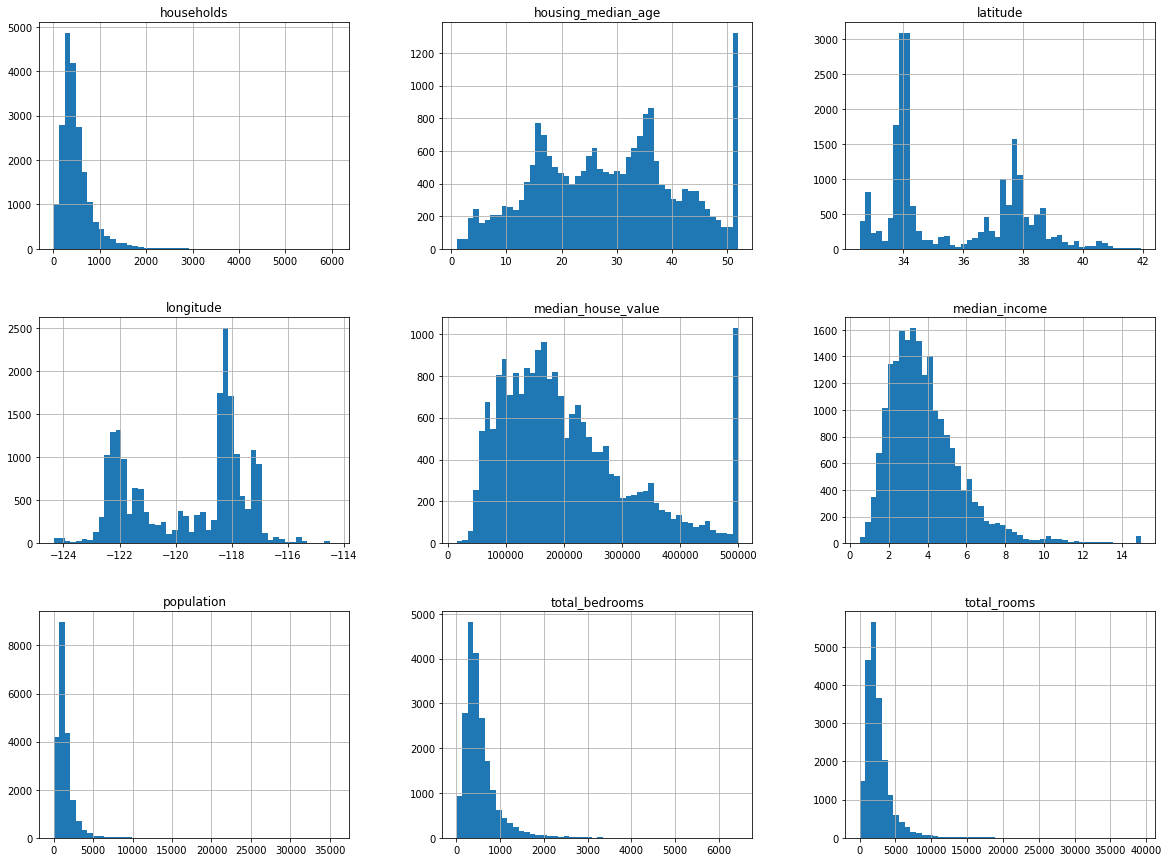

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from operator import *
from cytoolz import *
from scipy import stats
import sympy

housing.hist(bins=50, figsize=(20, 15))
plt.show()

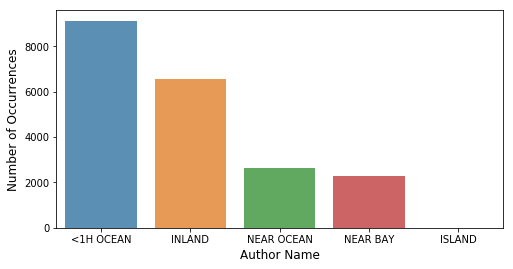

In [99]:
# 对于离散型变量，可以根据出现次数进行显示
def col_bar_plot(train, col):
    cnt_srs = train[col].value_counts()
    plt.figure(figsize=(8, 4))
    sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Author Name', fontsize=12)
    plt.show()
col_bar_plot(housing, 'ocean_proximity')

## 1.2 验证性数据分析
是研究如何根据样本数据来推断总体样本数量特征，它是在对样本数据进行描述统计分析的基础上，对研究总体的数量特征做出推断。常见的分析方法有
* ①假设检验、设检验是推论统计中用于检验统计假设的一种方法。而“统计假设”是可通过观察一组随机变量的模型进行检验的科学假说。一旦能估计未知参数，就会希望根据结果对未知的真正参数值做出适当的推论。
* ②相关分析、是研究两个或两个以上处于同等地位的随机变量间的相关关系的统计分析方法。
* ③回归分析、是确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法。
* ④时间序列分析等方法。



### 1.2.1 一元变量控制图
下面我们首先介绍$\overline{X}$控制图
1. 按时间顺序对各个观测值或者样本均值做绘制
2. 生成并画出所有观测值样本均值的中心线$\overline{x}$
3. 按照如下公式计算并画出控制线
   
   控制上限$(UCL) = \overline{x}+3\times标准差$
   
   控制下限$(LCL) = \overline{x}-3\times标准差$

In [217]:
import numpy as np
from operator import *
from cytoolz import *
from scipy import stats
import sympy


def quality_control_df(df):
    cols = df.columns[df.dtypes == np.number].values
    p = len(cols)
    n = len(df)
    X = df[cols].values
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(p)))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    Sii = np.array(list(map(lambda x:S[x,x],range(p))))
    UCL = x_ + 3*np.sqrt(Sii)
    LCL = x_ - 3*np.sqrt(Sii)
    x = list(range(n))

    for i in range(p):
        plt.figure(i+1, figsize=(12, 8))
        plt.plot(x,X[:,i],'g-')
        plt.plot([x[0], x[-1]],[UCL[i],UCL[i]],'b-')
        plt.plot([x[0], x[-1]],[LCL[i],LCL[i]],'b-')
        plt.plot([x[0], x[-1]],[x_[i],x_[i]],'r-')
        plt.title(f"{cols[i]} Control Picture")
        plt.grid()


['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value']
(20640, 9)


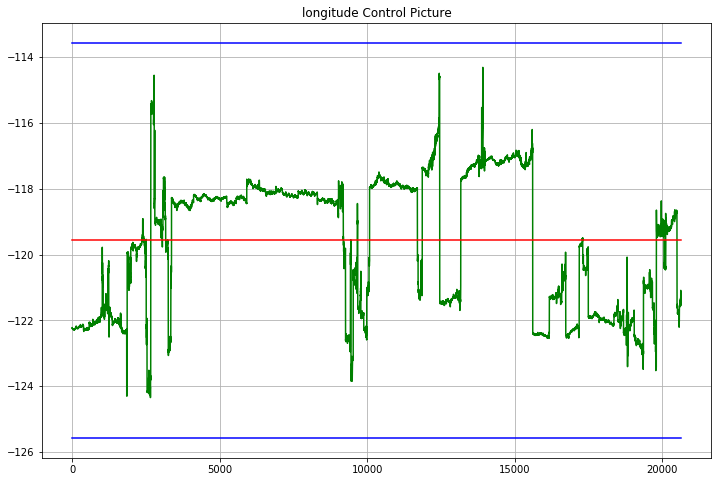

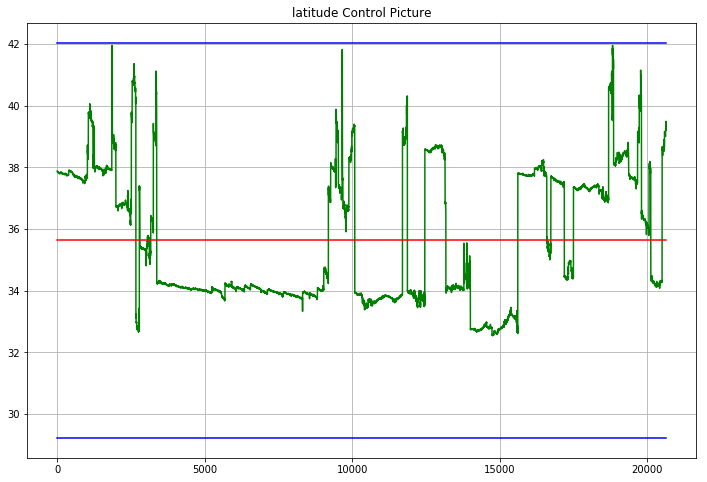

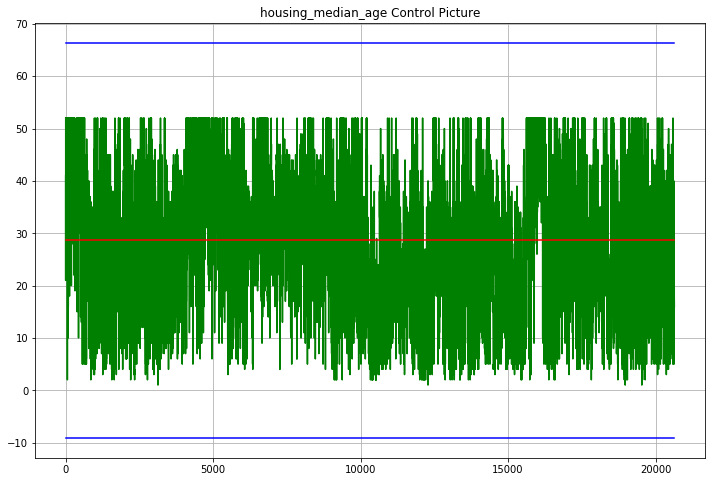

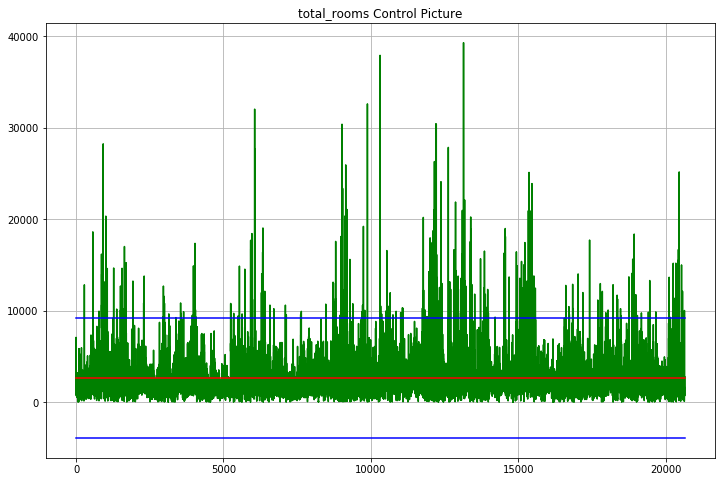

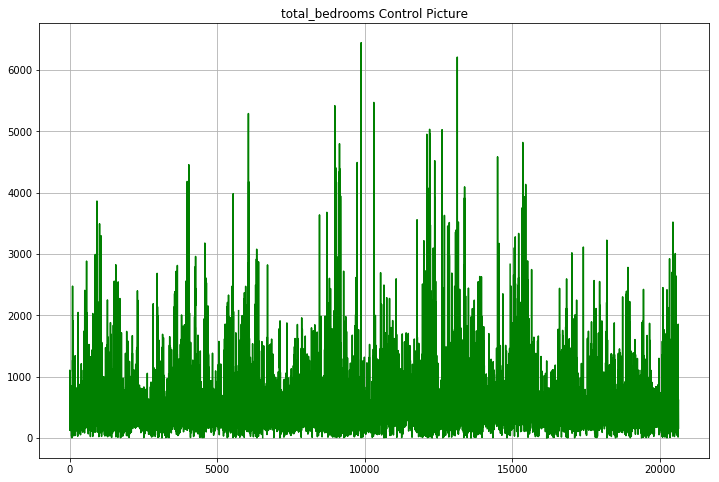

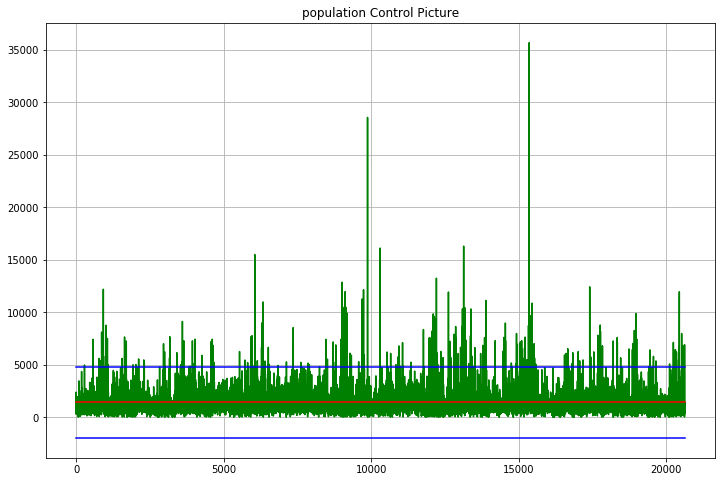

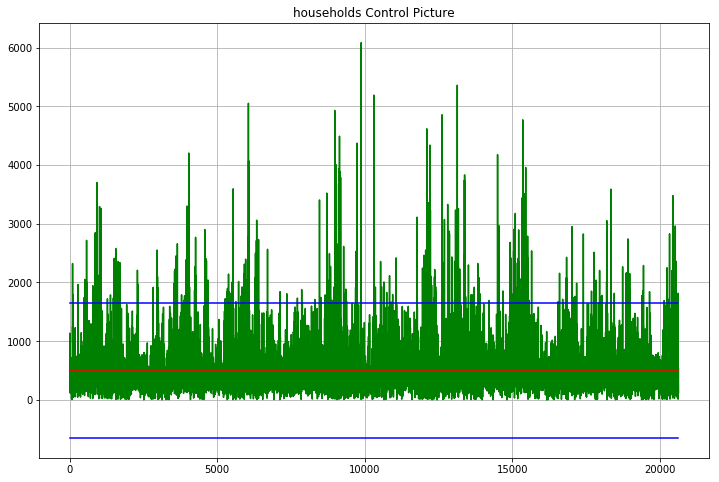

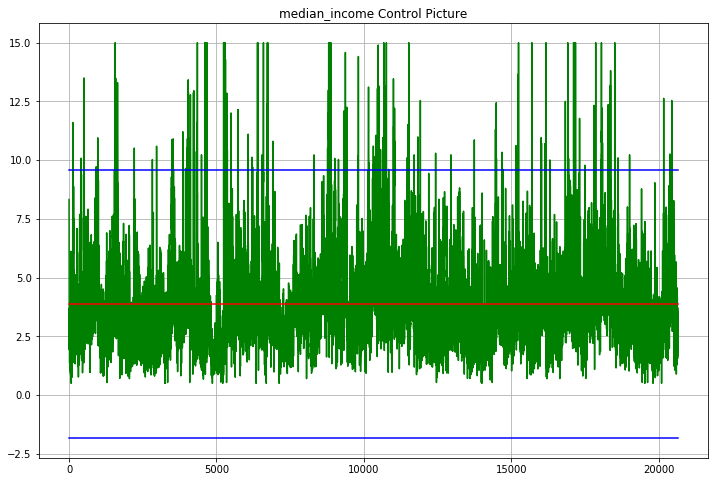

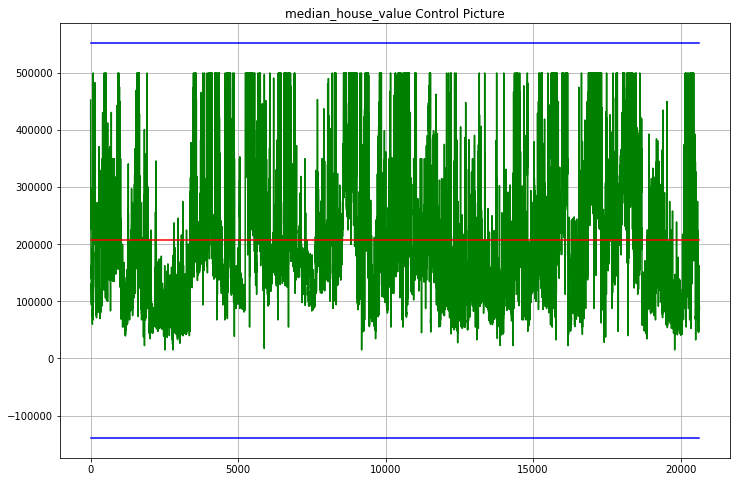

In [218]:
quality_control_df(housing)

### 1.2.2 $T^2$控制图
对于两个以上目标，需要使用$T^2$控制图。与散点图不同，它的点是按照时间顺序给出的，对于第ｊ个点计算$T^2$统计量
$$T_j^2=(x_j-\overline{x})^{'}S^{-1}(x_j-\overline{x})$$
然后将$T^2$值画在时间轴上，控制下限为０，控制上限$UCL=\chi_p^2(0.05)$

In [302]:
def T_squre_chart_df(df, alpha):
    cols = df.columns[df.dtypes == np.number].values
    p = len(cols)
    n = len(df)
    X = df[cols].values    
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(p)))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)    
    S_r = np.linalg.inv(S)  
    T = list(map(lambda x:(x - x_).dot(S_r).dot(x.T - x_.T), map(lambda k:X[k,:],range(n))))
    c = stats.chi2.isf(alpha, p)
    plt.figure(figsize=(12,8))
    plt.plot(list(range(n)),T, '.',color='g',)
    plt.plot([0,n],[c, c],'-', color='r',label=f"{100*(1-alpha)}%")
    plt.legend()

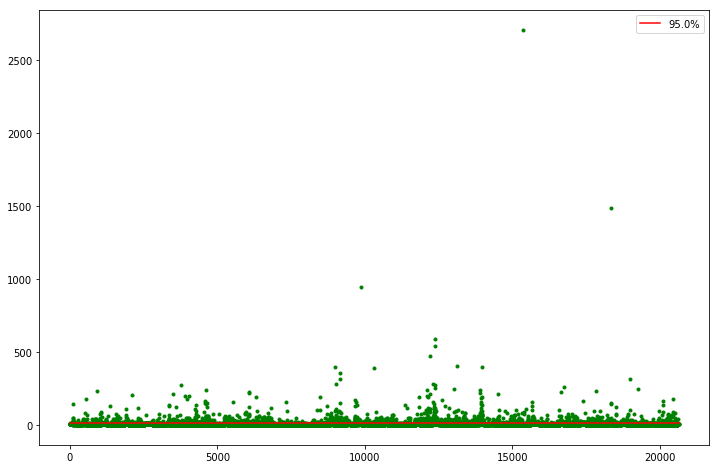

In [307]:
T_squre_chart_df(housing.fillna(0), 0.05)

### 1.2.3 相关分析
相关分析是研究两个或两个以上处于同等地位的随机变量间的相关关系的统计分析方法。例如，人的身高和体重之间；空气中的相对湿度与降雨量之间的相关关系都是相关分析研究的问题。相关分析与回归分析之间的区别：回归分析侧重于研究随机变量间的依赖关系，以便用一个变量去预测另一个变量;相关分析侧重于发现随机变量间的种种相关特性。相关分析在工农业、水文、气象、社会经济和生物学等方面都有应用。<br >

#### 1.2.3.1 皮尔逊
相关分析中最简单的是线性相关分析。即变量之间存在线性关系，皮尔逊相关系数广泛用于度量两个变量之间的相关程度，其值介于-1与1之间。它是由卡尔·皮尔逊从弗朗西斯·高尔顿在19世纪80年代提出的一个相似却又稍有不同的想法演变而来的。这个相关系数也称作“皮尔逊积矩相关系数”。下图显示了[-1,1]的相关系数图像。
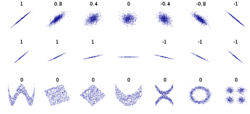
两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商,公式如下：
$$\rho_{X,Y} = \frac{\sigma_{X}\sigma_{Y}}{cov(X,Y)} = \frac{\sigma_X\sigma_Y}{E[(X-\mu_X)(Y-\mu_Y)]}$$
皮尔逊相关系数有一个重要的数学特性是，因两个变量的位置和尺度的变化并不会引起该系数的改变，即它该变化的不变量(由符号确定)。也就是说，我们如果把X,Y进行平移，并不会改变两个变量的相关系数（该结论在总体和样本皮尔逊相关系数中都成立）。我们发现更一般的线性变换则会改变相关系数，相关系数也可以被视作由两个随机变量向量夹角的余弦值。

#### 1.2.3.2 斯皮尔曼相关系数
在统计学中, 以查尔斯·斯皮尔曼命名的斯皮尔曼等级相关系数，即spearman相关系数。经常用希腊字母$ρ$表示。 它是衡量两个变量的依赖性的非参数指标。 它利用单调方程评价两个统计变量的相关性。 如果数据中没有重复值， 并且当两个变量完全单调相关时，斯皮尔曼相关系数则为+1或−1。
斯皮尔曼相关系数被定义成等级变量之间的皮尔逊相关系数。对于样本容量为n的样本，n个原始数据被转换成等级数据，相关系数$ρ$为
斯皮尔曼相关系数表明X(独立变量)和Y(依赖变量)的相关方向。如果当X增加时，Y趋向于增加，斯皮尔曼相关系数则为正。如果当X增加时，Y趋向于减少，斯皮尔曼相关系数则为负。斯皮尔曼相关系数为零表明当X增加时Y没有任何趋向性。当X和Y越来越接近完全的单调相关时，斯皮尔曼相关系数会在绝对值上增加。当X和Y完全单调相关时，斯皮尔曼相关系数的绝对值为1。完全的单调递增关系意味着任意两对数据Xi，Yi和Xj，Yj，有Xi−Xj和Yi−Yj总是同号。完全的单调递减关系意味着任意两对数据Xi，Yi和Xj，Yj，有Xi−Xj和Yi−Yj总是异号。
斯皮尔曼相关系数经常被称作"非参数"的。这里有两层含义。首先，当X和Y的关系是由任意单调函数描述的，则它们是完全皮尔逊相关的。与此相应的，皮尔逊相关系数只能给出由线性方程描述的X和Y的相关性。其次，斯皮尔曼不需要先验知识(也就是说，知道其参数)便可以准确获取XandY的采样概率分布。

#### 1.2.3.4 肯德尔相关系数 
在统计学中，肯德尔相关系数是以Maurice Kendall命名的，并经常用希腊字母τ（tau）表示其值。肯德尔相关系数是一个用来测量两个随机变量相关性的统计值。一个肯德尔检验是一个无参数假设检验，它使用计算而得的相关系数去检验两个随机变量的统计依赖性。肯德尔相关系数的取值范围在-1到1之间，当τ为1时，表示两个随机变量拥有一致的等级相关性；当τ为-1时，表示两个随机变量拥有完全相反的等级相关性；当τ为0时，表示两个随机变量是相互独立的。

In [312]:
import pandas as pd
import numpy as np
 
#原始数据
X1=pd.Series([1, 2, 3, 4, 5, 6])
Y1=pd.Series([0.3, 0.9, 2.7, 2, 3.5, 5])
 
X1.mean() #平均值# 3.5
Y1.mean() #2.4
X1.var() #方差#3.5
Y1.var() #2.9760000000000004
 
X1.std() #标准差不能为0# 1.8708286933869707
Y1.std() #标准差不能为0#1.725108692227826
X1.cov(Y1) #协方差#3.0600000000000005
 
X1.corr(Y1,method="pearson") #皮尔森相关性系数 #0.9481366640102855
X1.cov(Y1)/(X1.std()*Y1.std()) #皮尔森相关性系数 # 0.9481366640102856
X1.corr(Y1,method='spearman') #0.942857142857143  spearman
X1.corr(Y1,method='kendall')  #0.8666666666666666 Kendall

0.8666666666666666

## 1.3 探索性数据分析

探索性数据分析是指为了形成值得假设的检验而对数据进行分析的一种方法，是对传统统计学假设检验手段的补充。该方法由美国著名统计学家约翰·图基(John Tukey)命名。

探索性分析主要是通过一些分析方法从大量的数据中发现未知且有价值信息的过程，它不受研究假设和分析模型的限制，尽可能地寻找变量之间的关联性。常见的分析方法有
* ①聚类分析、
* ②主成分分析、
* ③典型相关分析、
* ④因子分析、
* ⑤对应分析等方法。

### 1.3.1 聚类分析


### 1.3.2 主成分分析


### 1.3.3 典型相关分析
典型相关分析的目的是识别并量化两组变量之间的联系，Hotelling最早开发了这项技术，研究重点是，一组变量的线性组合和另一组变量的线性组合之间相关关系，思路如下：首先求一对线性组合，它有最大相关系数，下一步从与选出对不相关的线性组合配对中，选出有最大相关系数的一对，如此继续下去，选出的线性组合配对成为典型变量，它们之间的相关系数称为典型相关系数。
典型相关系数度量了这两组变量之间联系的强度，此项最大化技术是努力将两组变量间一个高维关系浓缩到少数几对典型变量来体现。

In [314]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import CCA
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [3.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
cca = CCA(n_components=1)
cca.fit(X, Y)

CCA(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)
X_c, Y_c = cca.transform(X, Y)


**典型变量和典型相关系数**

我们关心的是两组变量之间联系的度量，用$(p \times 1)$随即向量$X^{(1)}$代表第一组的p个变量，$q \times 1$随机向量$X^(2)$代表第二组的q个变量。在理论研究中，我们假设$X^{(1)}$是较小的组，即$p \leq q$。

对于随机变量$X^{(1)}，X^{(1)}$令
$$E(X^{(1)})=\mu^{(1)}; \qquad Cov(X^{(1)})=\Sigma_{11}$$
$$E(X^{(2)})=\mu^{(2)}; \qquad Cov(X^{(2)})=\Sigma_{22}$$
$$Cov(X^{(1)},X^{(2)}) = \Sigma_{21} = \Sigma_{21}^{'}$$

把$X^{(1)}，X^{(1)}$联合起来考虑是方便的，则向量如下
$$\mathop{X}_{((p + q)\times 1)}  = \begin{bmatrix} X^{(1)} \\ X^{(2)} \end{bmatrix} = \begin{bmatrix}X^{(1)}_{1} \\ X^{(1)}_{2} \\ \vdots \\ X^{(1)}_{p} \\ X^{(2)}_{1}\\ X^{(2)}_{2}\\ \vdots \\ X^{(2)}_{q}\end{bmatrix} \tag 2$$
有均值向量
$$ \mathop{\mu}_{((p + q)\times 1)} = E(X) = \begin{bmatrix}E(X^{(1)}) \\ E(X^{(2)})\end{bmatrix} = \begin{bmatrix} \mu^{(1)} \\ \mu^{(2)}\end{bmatrix}$$
和协方差矩阵
$$\Sigma_{(p+q)\times(p+q)} = E(X - \mu)(X-\mu)^{'}$$ 
$$=\begin{bmatrix} E(X^{(1)} - \mu^{(1)})(X^{(1)}-\mu^{(1)})^{'} & E(X^{(1)} - \mu^{(1)})(X^{(2)}-\mu^{(2)})^{'} \\ E(X^{(2)} - \mu^{(2)})(X^{(1)}-\mu^{(1)})^{'} & E(X^{(2)} - \mu^{(2)})(X^{(2)}-\mu^{(2)})^{'} \end{bmatrix} \tag 3$$
$$= \begin{bmatrix}\mathop{\Sigma_{11}}_{(p\times p)} & \mathop{\Sigma_{12}}_{(p\times q)}  \\ \mathop{\Sigma_{21}}_{(q\times p)} & \mathop{\Sigma_{22}}_{(q\times q)}\end{bmatrix} \tag 4$$
来自不同组(一个来自$X^{(1)}$，一个来自$X^{(2)}$)的变量配对之间的协方差包含于$\Sigma_{12}$中，或者等价的包含于$\Sigma_{21}$中，也就是说$\Sigma_{12}$中的pq个元素度量这两组之间的联系。当p和q较大的时候，整体的解释$\Sigma_{12}$中的元素基本上是没有希望的，而且，为达到预测和比较的目的，变量的线性组合常常是我们感兴趣的。典型相关分析的主要任务是，用$\Sigma_{12}$中几个经过仔细挑选的协方差(相关系数)而不是它的全部pq个协方差来综合度量$X^{(1)}$和$X^{(2)}$间的相关关系。

线性组合提供了对一组变量简单扼要的度量，对系数向量$\boldsymbol{a}和\boldsymbol{b}$的某些配对，设
$$U = \boldsymbol{a}^{'}X^{(1)} \tag 5$$
$$V = \boldsymbol{b}^{'}X^{(2)}$$
利用矩阵变化得到
$$Var(U) = \boldsymbol{a}^{'}Cov(X^{(1)})\boldsymbol{a} = \boldsymbol{a}^{'}\Sigma_{11}\boldsymbol{a}$$
$$Var(V) = \boldsymbol{b}^{'}Cov(X^{(2)})\boldsymbol{b} = \boldsymbol{b}^{'}\Sigma_{22}\boldsymbol{b} \tag 6$$
$$Cov(U,V) = \boldsymbol{a}^{'}Cov(X^{(1)},X^{(2)})\boldsymbol{b} = \boldsymbol{a}^{'}\Sigma_{12}\boldsymbol{b}$$
我们将寻找系数向量$\boldsymbol{a}$和$\boldsymbol{b}$，使得
$$Corr(U,V)=\frac{\boldsymbol{a}^{'}\Sigma_{12}\boldsymbol{b}}{\sqrt{\boldsymbol{a}^{'}\Sigma_{11}\boldsymbol{a}}\sqrt{\boldsymbol{b}^{'}\Sigma_{22}\boldsymbol{b}}} \tag 7$$
尽可能大。

我们做如下定义:<br >
**第一对典型变量**，是具有单位方差的线性组合$U_1$和$V_1$的配对，它使对应的相关系数(7)最大化<br >
**第二对典型变量**，是具有单位方差的线性组合$U_2$和$V_2$的配对，而在与第一对典型变量不相关的所有配对中，它使对应的相关系数(7)最大化<br >
在第k步中:<br >
**第K对典型变量**，是具有单位方差的线性组合$U_k$和$V_k$的配对，而在k-1个典型变量配对都对不相关的所有配对中，其相关系数(7)为最大。<br >
第k对典型变量之间相关系数称为**第k典型相关系数**<br >
**结论10.1** 假设$p\leq q$，随机向量$X^{(1)}$和$X^{(2)}$有<br >
$$Cov(X^{(1)}) = \mathop{\Sigma_{11}}_{(p\times p)}, \qquad Cov(X^{(2)}) = \mathop{\Sigma_{22}}_{(q\times q)} \qquad及\qquad Cov(X^{(1)},X^{(2)}) = \mathop{\Sigma_{12}}_{(p\times q)}$$其中$\Sigma$是满秩的，对系数向量$\mathop{\boldsymbol{a}}_{(p\times q)} 和 \mathop{\boldsymbol{b}}_{(p\times q)}$,构成线性组合$U = \boldsymbol{a}^{'}X^{(1)}$和$V = \boldsymbol{b}^{'}X^{(2)}$，则由线性组合(第一典型变量配对)
$$U_1=\underbrace{\boldsymbol{e}_1^{'}\Sigma_{11}^{-1/2}X^{(1)}}_{\boldsymbol{a}_1^{'}} \qquad 和 \qquad V_1=\underbrace{\boldsymbol{f}_1^{'}\Sigma_{22}^{-1/2}X^{(2)}}_{\boldsymbol{b}_1^{'}}$$
达到$$\max_{\boldsymbol{a},\boldsymbol{b}}Corr(U,V)=\rho_{1}^{*}$$
对第k对典型变量,$k=2,3,\dots,p$，
$$U_k=\boldsymbol{e}_k^{'}\Sigma_{11}^{-1/2}X^{(1)} \qquad V_k=\boldsymbol{f}_k^{'}\Sigma_{22}^{-1/2}X^{(2)}$$
使$$Corr(U_k,V_k)=\rho_k^{*}$$
在那些与前面$1,2,\dots,k-1$个典型变量无关的线性组合中最大化。<br >
这里$\rho_1^{*2}\geq \rho_2^{*2} \geq \dots \geq \rho_p^{*2}$是$\Sigma_{11}^{-1/2}\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}\Sigma_{11}^{-1/2}$的特征值，而$\boldsymbol{e}_1,\boldsymbol{e}_2,\dots, \boldsymbol{e}_p$是相应的$(p\times 1)$特征向量。<br >
典型变量具有性质<br >
$$Var(U_k)=Var(V_k) = 1$$
$$Cov(U_k,V_l) = Corr(U_k,U_l)=0 \quad k \neq l$$

**标准化变换**
如果把原来的变量用$Z^{(1)}=[Z_1^{(1)},Z_2^{(1)},\dots,Z_p^{(1)}]^{'}$和$Z^{(2)}=[Z_1^{(2)},Z_2^{(2)},\dots,Z_p^{(2)}]^{'}$来标准化，典型变量具有如下形式
$$U_k=\boldsymbol{a}_k^{'}Z^{(1)} = \boldsymbol{e}_k^{'}\boldsymbol{\rho}_{11}^{-1/2}Z^{(1)}$$
$$V_k=\boldsymbol{b}_k^{'}Z^{(2)} = \boldsymbol{f}_k^{'}\boldsymbol{\rho}_{22}^{-1/2}Z^{(2)} \tag 8$$
这里$Cov(Z^{(1)})=\rho_{11}$,$Cov(Z^{(2)})=\rho_{22}$,$Cov(Z^{(1)},Z^{(2)})=\rho_{12}=\rho_{21}^{'}$
$\boldsymbol{e}_k及\boldsymbol{f}_k$ 分别为$\boldsymbol{\rho}_{11}^{-1/2}\boldsymbol{\rho}_{12}\boldsymbol{\rho}_{22}^{-1}\boldsymbol{\rho}_{21}\boldsymbol{\rho}_{11}^{-1/2}$及$\boldsymbol{\rho}_{22}^{-1/2}\boldsymbol{\rho}_{21}\boldsymbol{\rho}_{11}^{-1}\boldsymbol{\rho}_{12}\boldsymbol{\rho}_{22}^{-1/2}$的特征向量，而典型相关系数$\rho_k$满足$$Corr(U_k,V_k) = \rho_k^{*}, \quad k=1,2,\dots, p \tag 9$$
其中$\rho_1^{*2} \geq \rho_2^{*2} \geq \dots \geq \rho_p^{*2}$是矩阵$\boldsymbol{\rho}_{11}^{-1/2}\boldsymbol{\rho}_{12}\boldsymbol{\rho}_{22}^{-1}\boldsymbol{\rho}_{21}\boldsymbol{\rho}_{11}^{-1/2}$(或等价的，矩阵$\boldsymbol{\rho}_{22}^{-1/2}\boldsymbol{\rho}_{21}\boldsymbol{\rho}_{11}^{-1}\boldsymbol{\rho}_{12}\boldsymbol{\rho}_{22}^{-1/2}$)的非零特征向量值。

In [315]:
# 计算标准化变量的典型变量和典型相关系数
p_11 = np.matrix([[1.0,0.4],[0.4, 1.0]])
p_12 = np.matrix([[0.5, 0.6], [0.3, 0.4]])
p_21 = p_12.T
p_22 = np.matrix([[1.0, 0.2],[0.2, 1.0]])

In [316]:
Z = np.hstack((np.vstack((p_11, p_21)),np.vstack((p_12,p_22))))
p_111 = np.linalg.inv(np.sqrt(p_11))
p_222 = np.linalg.inv(p_22)
p = p_111.dot(p_12).dot(p_222).dot(p_21).dot(p_111)
np.linalg.eig(p)

(array([0.50242975, 0.00230362]), matrix([[ 0.99993695, -0.01122919],
         [ 0.01122919,  0.99993695]]))

### 1.3.4 因子分析


### 1.3.5 对应分析方法